In [1]:
#!pip install -i https://test.pypi.org/simple/ brown-edu-dmtools==0.1.10

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import ast
## plt.rcParams['text.usetex'] = True

# for legend
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [28]:
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolsClient
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolTestData
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import PlotTrace

In [29]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
#load_dotenv(path.join(BASE_DIR, ".env"))
load_dotenv(path.join(BASE_DIR, ".env"), override=True)
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)
#Client.request_header

In [30]:
pt = PlotTrace()

In [39]:
import json
# Define the query parameters as a dictionary
params = {
    'name_like' : "CDMS"
}

params_as_string = json.dumps(params)

# Pass the encoded query to the API client
r = Client.query(subject='plot', query_criteria=params_as_string)
#r

query function encoded query string >>>  name_like%3DCDMS
query_url >>>>>>>>>>> https://dmtools.brown.edu/dmtool/fastapi_data/open/data/0.0/plot/query/?query_in=name_like%3DCDMS


In [40]:
plot_id = 8
datasets = Client.read_by_plot_id(subject='data_display',id=plot_id)
datasets

[{'id': 5,
  'subject': 'data_display',
  'name': None,
  'old_id': None,
  'old_plot_id': 22,
  'limit_id': 222,
  'plot_id': 8,
  'color': 'b',
  'style': 'line',
  'data_id': 206,
  'updated_at': '2009-08-27T07:13:03',
  'open': None}]

In [41]:
pt = PlotTrace()
#pt.set_values(trace_color, trace_style)
print(pt.mode,pt.line,pt.marker,pt.fillcolor,pt.opacity,pt.fill)

lines {'color': 'red', 'width': 1, 'dash': 'solid'} {'symbol': 'x'} rgba(0,255,255,0.05) 1 toself


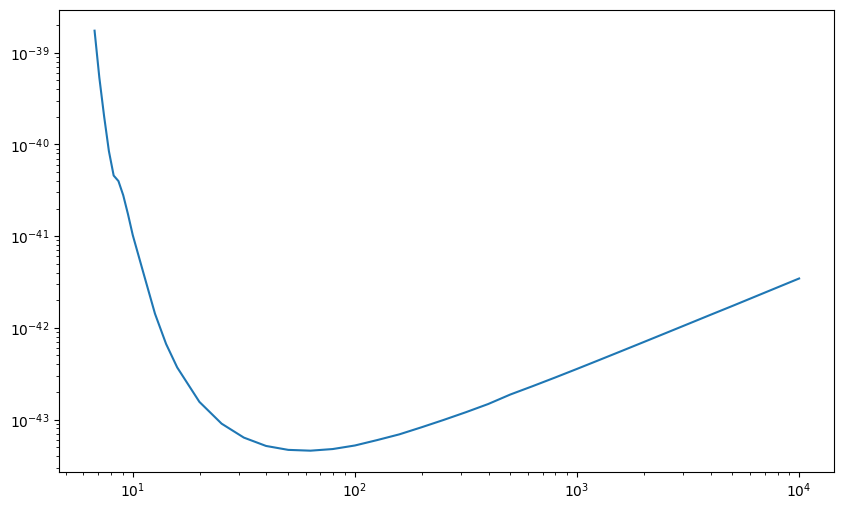

In [34]:
plt.figure(figsize=(10, 6))

for d in datasets:
    data_id = d['data_id']
    trace_data = Client.read(id=data_id)
    string_data = trace_data[0]['data']
    style = d['style']
    color = d['color']
    pt.set_values(color, style)
    list_data = ast.literal_eval(string_data)
    trace_count = len(list_data)
    trace_names_int = list(range(0,trace_count))
    trace_names_int
    trace_names = []
    for t in trace_names_int:
        trace_names.append(str(t))
        x = [item[0] for item in list_data[t]]
        y = [item[1] for item in list_data[t]]
        
        if pt.fill != 'toself':
            plt.plot(x, y, label=str(t))
        else:
            plt.fill_between(x, y, alpha=0.3, label='Area Trace')

# Add labels and title
# plt.xlabel('Masses')
# plt.ylabel('Cross Sections')


#plt.title('Two Lists of Lists Plotted')
plt.xscale('log')
plt.yscale('log')

# Show legend
#plt.legend()

# Show plot
plt.show()

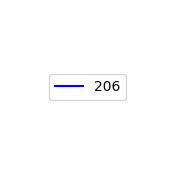

In [43]:
handles = []

for d in datasets:
    data_id = d['data_id']
    trace_data = Client.read(id=data_id)
    string_data = trace_data[0]['data']
    style = d['style']
    color = d['color']
    pt.set_values(color, style)
    list_data = ast.literal_eval(string_data)
    trace_count = len(list_data)
    trace_names_int = list(range(0,trace_count))
    trace_names_int
    trace_names = []
    for t in trace_names_int:
        trace_names.append(str(t))
        x = [item[0] for item in list_data[t]]
        y = [item[1] for item in list_data[t]]
        
        if pt.fill != 'toself':
            append_this = mlines.Line2D([], [], color=color, label=str(data_id), linestyle='-')
        else:
            append_this = mpatches.Patch(color=color, alpha=0.3, hatch='/', label=str(data_id))
        handles.append(append_this)

#line1_handle = mlines.Line2D([], [], color='blue', label='Sine Wave', linestyle='-')
#line2_handle = mlines.Line2D([], [], color='green', label='Cosine Wave', linestyle='-')

#fill1_handle = mpatches.Patch(color='blue', alpha=0.3, hatch='/', label='Sine Fill')
#fill2_handle = mpatches.Patch(color='green', alpha=0.3, hatch='\\', label='Cosine Fill')

# Combine handles and labels
#handles = [line1_handle, line2_handle, fill1_handle, fill2_handle]
labels = [handle.get_label() for handle in handles]

# Create a new figure just for the legend
fig, ax = plt.subplots(figsize=(2, 2))
ax.legend(handles=handles, labels=labels, loc='center')
ax.axis('off')  # Hide the axes
plt.show()

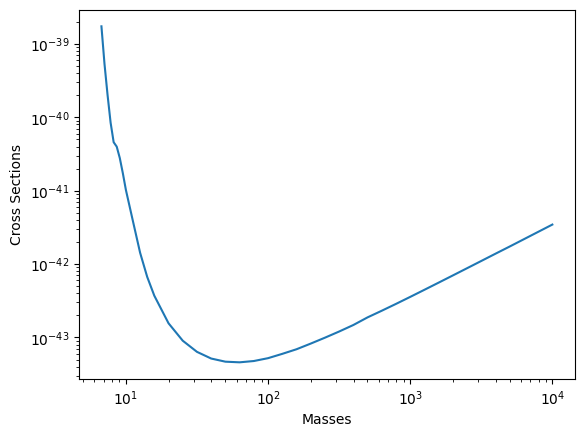

In [36]:
# Now you can plot these two lists using matplotlib

for tl in range(0,trace_count):
    # Plot the first list as a line
    #list_data[tl]
    '''
    numpy_array = np.array(list_data[tl])
    x = numpy_array[:, 0]
    y = numpy_array[:, 1]
    '''
    x = [item[0] for item in list_data[tl]]
    y = [item[1] for item in list_data[tl]]
    
    if pt.fill != 'toself':
        plt.plot(x, y, label=str(tl))
    else:
        plt.fill_between(x, y, alpha=0.3, label='Area Trace')


# Add labels and title
plt.xlabel('Masses')
plt.ylabel('Cross Sections')


#plt.title('Two Lists of Lists Plotted')
plt.xscale('log')
plt.yscale('log')

# Show legend
#plt.legend()

# Show plot
plt.show()

In [37]:
'''

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add a title and labels using mathtext
plt.title(r'This is a $\sin(x)$ function', fontsize=16)  # LaTeX-like syntax
plt.xlabel(r'$\theta$ (radians)', fontsize=14)           # LaTeX-like syntax
plt.ylabel(r'$\sin(\theta)$', fontsize=14)               # LaTeX-like syntax

# Display the plot
plt.show()
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_49348/2025010216.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


"\n\n# Sample data\nx = np.linspace(0, 10, 100)\ny = np.sin(x)\n\n# Create the plot\nplt.plot(x, y)\n\n# Add a title and labels using mathtext\nplt.title(r'This is a $\\sin(x)$ function', fontsize=16)  # LaTeX-like syntax\nplt.xlabel(r'$\theta$ (radians)', fontsize=14)           # LaTeX-like syntax\nplt.ylabel(r'$\\sin(\theta)$', fontsize=14)               # LaTeX-like syntax\n\n# Display the plot\nplt.show()\n"

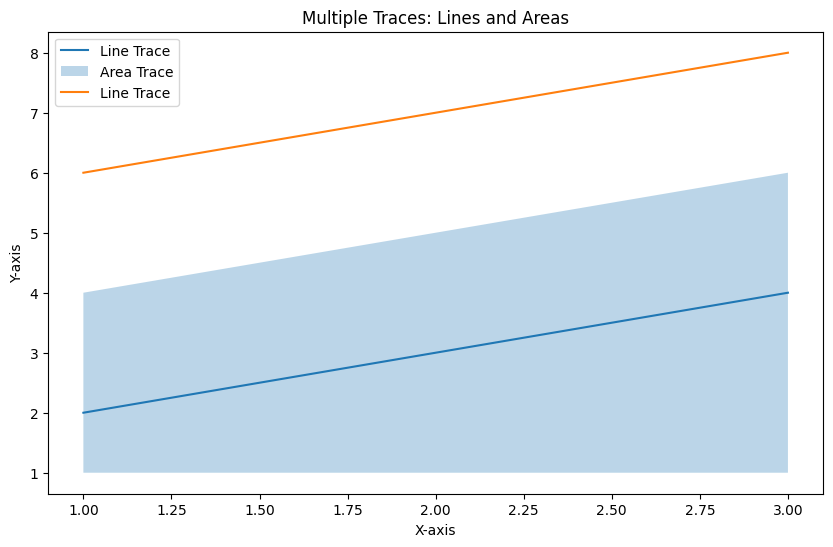

In [38]:


# Example data structure: list of list of lists
# Assuming the structure: [[[x_values_line], [y_values_line]], [[x_values_area], [y1_values_area], [y2_values_area]]]
traces = [
    [[1, 2, 3], [2, 3, 4]],        # Line trace
    [[1, 2, 3], [4, 5, 6], [1, 1, 1]],  # Area trace (with y2 values)
    [[1, 2, 3], [6, 7, 8]]         # Line trace
]

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate over traces and plot accordingly
for trace in traces:
    x_values = trace[0]
    y_values = trace[1]
    
    if len(trace) == 2:  # Line trace
        plt.plot(x_values, y_values, label='Line Trace')
    elif len(trace) == 3:  # Area trace
        y2_values = trace[2]
        plt.fill_between(x_values, y_values, y2_values, alpha=0.3, label='Area Trace')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Traces: Lines and Areas')

# Show legend
plt.legend()

# Show plot
plt.show()